In [1]:
import mxnet as mx 
from symbol import get_resnet_model
from symbol import YOLO_loss
from data_ulti import get_iterator

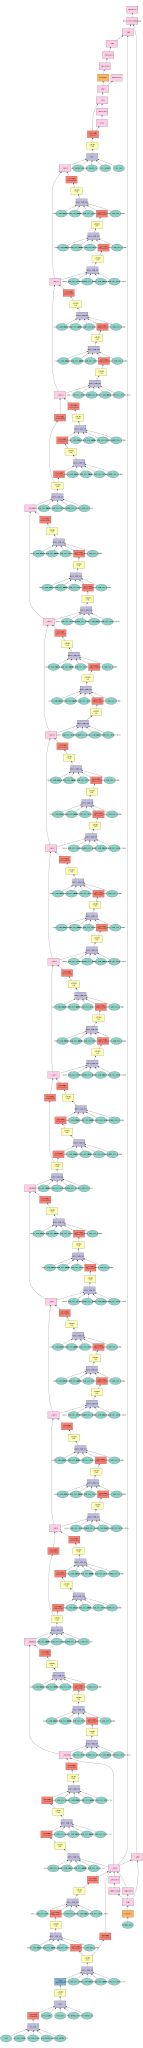

In [2]:
# get sym 
sym = get_resnet_model('resnet-50', 0)
_, args_params, aux_params = mx.model.load_checkpoint('resnet-50', 0)
logit = sym.get_internals()['logit_output']
mx.viz.plot_network(sym)

In [3]:
# get some input 
train_data = mx.io.ImageRecordIter(path_imgrec='cat.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)
val_data = mx.io.ImageRecordIter(path_imgrec='cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)

In [4]:
mod = mx.mod.Module(symbol=sym, context=mx.gpu(0))

In [5]:
mod.bind(train_data.provide_data, train_data.provide_label)

In [6]:
mod.init_params(allow_missing=True, arg_params=args_params, aux_params=aux_params, 
                initializer=mx.init.Xavier(magnitude=2,rnd_type='gaussian',factor_type='in'))

In [7]:
out = mod.predict(eval_data=train_data, num_batch=1)

In [9]:
out

[<NDArray 1x49x1 @gpu(0)>, <NDArray 1x5x7x7 @gpu(0)>]

Help on function transpose in module mxnet.symbol:

transpose(*args, **kwargs)
    Permutes the dimensions of an array.
    
    Examples::
    
      x = [[ 1, 2],
           [ 3, 4]]
    
      transpose(x) = [[ 1.,  3.],
                      [ 2.,  4.]]
    
      x = [[[ 1.,  2.],
            [ 3.,  4.]],
    
           [[ 5.,  6.],
            [ 7.,  8.]]]
    
      transpose(x) = [[[ 1.,  5.],
                       [ 3.,  7.]],
    
                      [[ 2.,  6.],
                       [ 4.,  8.]]]
    
      transpose(x, axes=(1,0,2)) = [[[ 1.,  2.],
                                     [ 5.,  6.]],
    
                                    [[ 3.,  4.],
                                     [ 7.,  8.]]]
    
    
    Defined in src/operator/tensor/matrix_op.cc:L168
    
    Parameters
    ----------
    data : Symbol
        Source input
    axes : Shape(tuple), optional, default=()
        Target axis order. By default the axes will be inverted.
    
    name : string, op